# M3: Cleaning a Messy Data Set
# DAV 6150

- Group Members: Qing Dou, Ruoyu Chen, Zhengnan Li
- Repository: https://github.com/jc000222/Data_Science_DAV6150/blob/main/M3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings('ignore')

# 1. Introduction
In this analysis, our goal is to explore and clean a wine attributes data set that suffers from a variety of data integrity and usability issues. We will perform a thorough EDA and perform appropriate data overview.

### 1.1 Approach
We devide the work into 5 steps:
- Introduction: Import the data set and introduce data variables.  

- Explanatory Data Analysis (EDA): Explore the raw dataset and do analysis based on domain knowledge.  

- Data Preparation: Perform data imputation and transformation, and filter the invalid data.  

- Prepped Data Review: Re-run the EDA to ensure the data is well prepared for subsequent modeling.  

### 1.2 Dataset 
The data set we will be using is comprised of information on more than 12,700 wines, with many of the attributes being related to the chemical composition of the wines. An 
overview of the data attributes is provided below:
| Attribute           | Description                                                |
|----------------------|------------------------------------------------------------|
| INDEX                | Unique ID                                                  |
| TARGET               | Response Variable (indicates # of cases of wine sold)      |
| FixedAcidity         | Fixed Acidity of the wine                                   |
| VolatileAcidity      | Volatile acid content of the wine                           |
| CitricAcid           | Citric Acid content of the wine                             |
| ResidualSugar        | Residual sugar content of the wine                          |
| Chlorides            | Chloride content of the wine                               |
| FreeSulfurDioxide    | Sulfur Dioxide content of the wine                         |
| TotalSulfurDioxide   | Total sulfur dioxide content of the wine                   |
| Density              | Density of the wine                                        |
| pH                   | pH of the wine                                             |
| Sulphates            | Sulfate content of the wine                                |
| Alcohol              | Alcohol Content                                            |
| LabelAppeal          | Subjective marketing score that indicates the appeal of the design of the label on the bottle |
| AcidIndex            | Measures total acidity of wine via a weighted average      |
| STARS                | Wine rating as determined by experts (4 = excellent; 1 = Poor) |
  
Read the data from our github repository. The dataframe is shown below.

In [2]:
wine_raw = pd.read_csv("https://raw.githubusercontent.com/jc000222/Data_Science_DAV6150/main/M3/M3_Data.csv")
wine_raw.head()

,Unnamed: 0,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,0,1,3,3.2,1.160,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,1,2,3,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,2,4,5,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,3,5,3,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,4,6,4,8.0,0.330,1.26,9.4,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


# 2. Exploratory Data Analysis
In this part, we will explore the raw dataset and analyze the missing and invalid values, make histograms and other graphs to determine how to clean the data to improve its usability.

### 2.1 Domain Knowledge
In order to better understand the dataset, we looked online for some extra domain knowledge:
| Term              | Description                                                                                                  |
|-------------------|--------------------------------------------------------------------------------------------------------------|
| Fixed Acidity     | Refers to the total concentration of acids that do not evaporate easily. Typically present in non-volatile compounds. Contributes to the overall taste and stability in wine. |
| Volatile Acidity  | Measures the concentration of acids that can easily evaporate. Primarily associated with acetic acid in wine, giving a vinegary aroma. Acceptable in small amounts for complexity, but excessive volatile acidity is considered a fault. |
| Citric Acid           | Weak organic acid found in citrus fruits. Contributes to the overall acidity and flavor profile of wine. |
| Residual Sugar        | Amount of sugar remaining in the wine after fermentation. Measured in grams per liter (g/L).           |
| Chlorides             | Concentration of chloride ions in the wine. Excessive amounts can impact taste and quality.             |
| Free Sulfur Dioxide   | SO2 that is present in wine but has not yet reacted is considered “free.” Free SO2 is what is still available to protect the wine. |
| Total Sulfur Dioxide  | Total amount of sulfur dioxide in the wine, including free and bound forms. Affects stability and shelf life. |
| Sulphates             | Concentration of sulfate ions in the wine. Can influence aroma and flavor. Related to sulfur dioxide use. |
| Alcohol               | Percentage of ethanol in the wine. Influences body, mouthfeel, and sensory characteristics.             |
| Acid Index            | Measure indicating the total acidity of a substance. Often used in wine analysis.                      |

### 2.2 EDA of Raw Data
First start with the matrix of the dataframe. The dataframe has 12795 rows of observations and 17 attributes. We will dive deeper into the dataframe by looking at different columns.

In [3]:
wine_raw.shape

(12795, 17)

__"Unnamed: 0" &	"INDEX"__  
The first two attributes appear to be the index of the dataset.To be noticed, the first column has consecutive numbers from 0 to 12794 and column "INDEX" is not consecutive with a maximum of 16129. They have no meaning to this dataset and can be dropped.

In [4]:
wine_raw[["Unnamed: 0","INDEX"]].describe()

,Unnamed: 0,INDEX
count,12795.000000,12795.000000
mean,6397.000000,8069.980305
std,3693.742682,4656.905107
min,0.000000,1.000000
25%,3198.500000,4037.500000
50%,6397.000000,8110.000000
75%,9595.500000,12106.500000
max,12794.000000,16129.000000


__"TARGET"__  
As the description indicates, this is a response variable and it indicates # of cases of wine sold. There are no missing value and the value should be an integer. We can tell from the bar plot of the count of each value of target that most wine are sold by 4 cases.

null value: 0


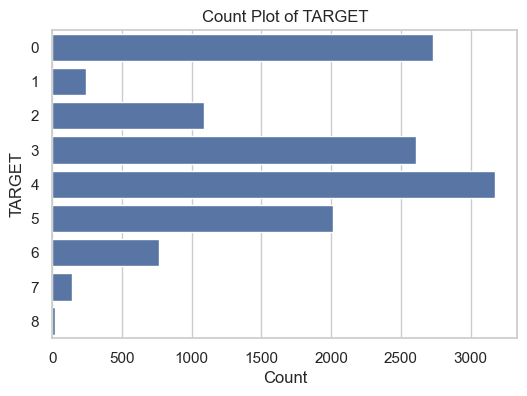

In [5]:
print("null value:",wine_raw["TARGET"].isnull().sum())
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(y='TARGET', data=wine_raw)
plt.ylabel('TARGET')
plt.xlabel('Count')
plt.title('Count Plot of TARGET')
plt.show()

__"FixedAcidity" & "VolatileAcidity"__  
These two attributes have no null value. Using the box plot we can learn that FixedAcidity has most values between 5-10 but have many outliers from over 15 to 35. The fixed acidity is generally under 15 g/L, but some wine can have fixed acidity for over 20 g/L and there are no legal limitation for fixed acidity.
And VolatileAcidity has most values between 0-2 and have ouliers under 5. This range is acceptable for standards of volatile acidity.

null value:
 FixedAcidity       0
VolatileAcidity    0
dtype: int64


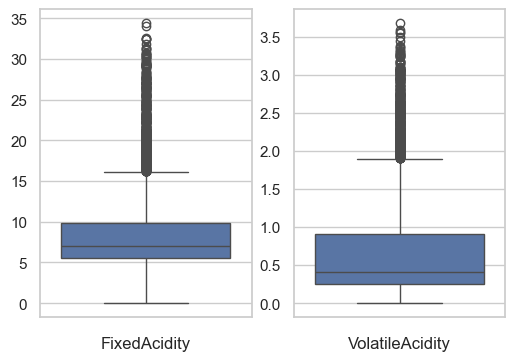

In [6]:
print("null value:\n",wine_raw[["FixedAcidity","VolatileAcidity"]].isnull().sum())
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 4))
sns.boxplot(ax=axes[0], data=wine_raw["FixedAcidity"])
axes[0].set_xlabel('FixedAcidity')
axes[0].set_ylabel('')
sns.boxplot(ax=axes[1], data=wine_raw["VolatileAcidity"])
axes[1].set_xlabel('VolatileAcidity')
axes[1].set_ylabel('')
plt.show()

__"CitricAcid"	"ResidualSugar"	"Chlorides"	"FreeSulfurDioxide"	"Sulphates" "TotalSulfurDioxide"__  
These attributes are the compounds in wine.There are about 600 null values in "ResidualSugar","Chlorides","FreeSulfurDioxide" and "TotalSulfurDioxide".  

+ __CitricAcid__ has most value in range 0.3-1.0, and have many outliers from over 2.0 to 4.0.  
+ __ResidualSugar__ has most value in range 5-40, and have many outliers from over 100. But there are no limitations for naturally occurring ResidualSugar. It is normal for some sweet wine to reach the value over 100.  
+ __Chlorides__ has most value from about 0 to 0.4 and have outliers over 1. There is no specific limit for chlorides.  
+ __FreeSulfurDioxide__ has most value between 20 and 180, and have many outliers for over 400. There is no regulation for Free Sulfur Dioxide, but Free Sulfur Dioxide and Reacted Sulfur Dioxide consists of Total Sulfur Dioxide, which has a 400 mg/L limits. So all values above 400 will be considered invalid.  
+ __Sulphates__ has most values under 1 and outliers up to 4. Sulphates are reacted sulfur dioxide and have a very small portion of total sulfur dioxide, and there are no regulation that limits it.  
+ __TotalSulfurDioxide__ has most value between 100 and 250, and have many outliers from over 500. The maximum acceptable limits for wine is 400 mg/L according to laws in canada(350 mg/L in US). All values above 400 will be considered invalid.

null value:
 CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
Sulphates             1210
TotalSulfurDioxide     682
dtype: int64


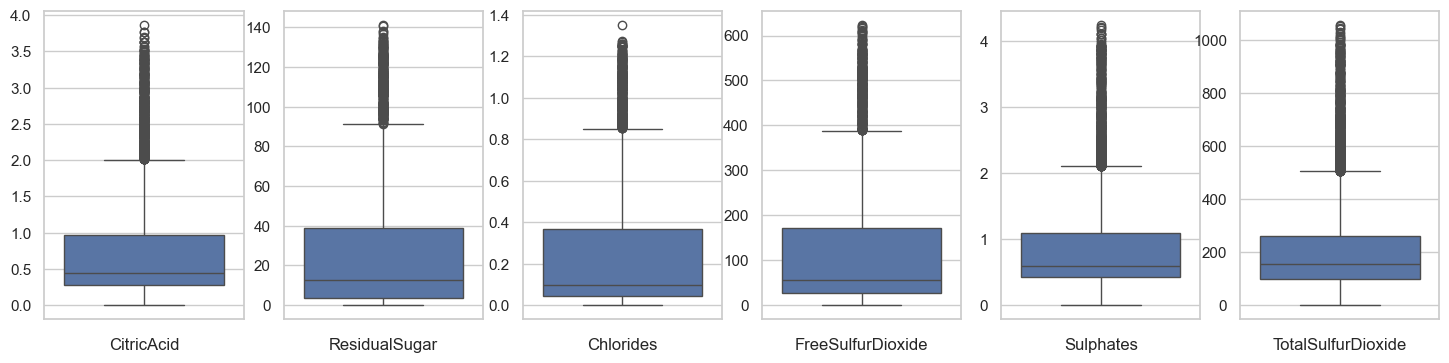

In [7]:
compounds = ["CitricAcid","ResidualSugar","Chlorides","FreeSulfurDioxide","Sulphates", "TotalSulfurDioxide"]
print("null value:\n",wine_raw[compounds].isnull().sum())
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(18, 4))
for i in range(6):
    sns.boxplot(ax=axes[i], data=wine_raw[compounds[i]])
    axes[i].set_xlabel(compounds[i])
    axes[i].set_ylabel('')
plt.show()

__"Density"	"pH" "Alcohol" "AcidIndex"__  
These are the characters of the wine. "ph" and "Alcohol" has null values.
+ __Density__ has most values around 1 and have outlier at about 0.9 and 1.1.  
+ __pH__ has most values around 3-3.5 and outliers at about 0.5 and 6. Fundamentally speaking, all wines lie on the acidic side of the pH spectrum, and most range from 2.5 to about 4.5 pH. Values beyond this range would be impossible for wine, thus will be invalid value.  
+ __Alcohol__ has most value between 9-13, but has outlier on both ends. The U.S. government recognizes wine as containing not more than 24 percent. All values outside this range will be considered invalid.  
+ __AcidIndex__ has most values around 8 and has no specific legal limitations.

null value:
 Density        0
pH           395
Alcohol      653
AcidIndex      0
dtype: int64


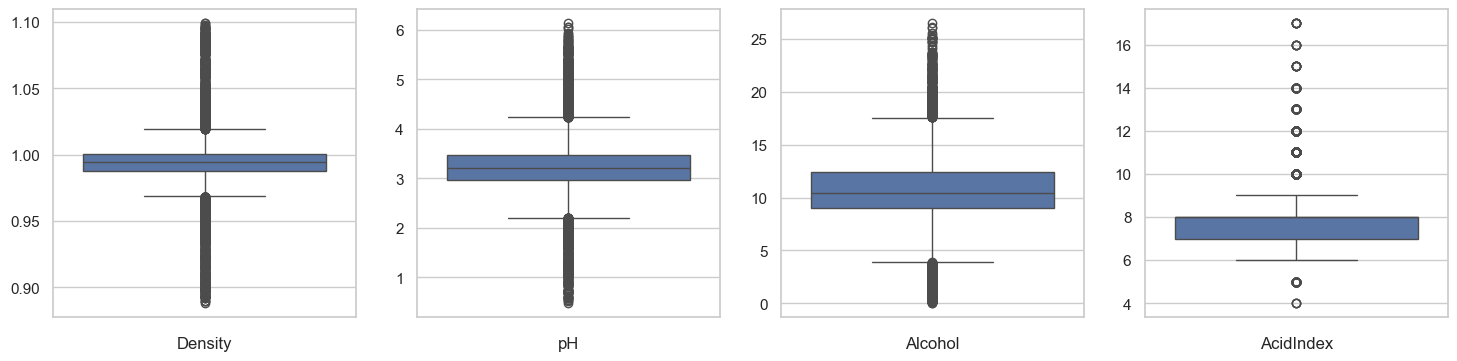

In [8]:
characters = ["Density","pH","Alcohol","AcidIndex"]
print("null value:\n",wine_raw[characters].isnull().sum())
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(18, 4))
for i in range(4):
    sns.boxplot(ax=axes[i], data=wine_raw[characters[i]])
    axes[i].set_xlabel(characters[i])
    axes[i].set_ylabel('')
plt.show()

__"LabelAppeal"	"STARS"__  
These are categorical variables of subjective score.
LabelAppeal has value -2 to 2 to indicate how appeal the label is. Most value is 0 as neutral.
STARS has many null values and indicates how customer like the wine.

null value:
 LabelAppeal       0
STARS          3359
dtype: int64


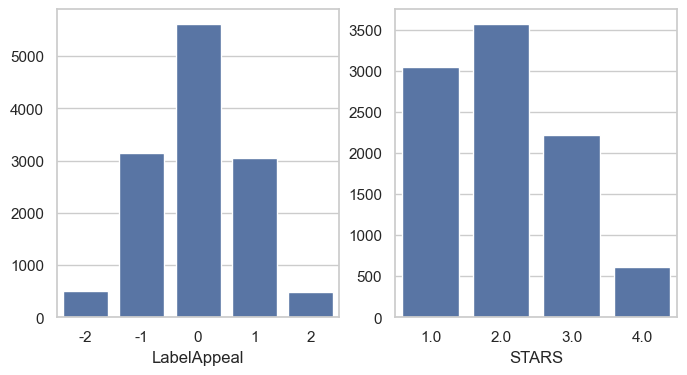

In [9]:
print("null value:\n",wine_raw[["LabelAppeal","STARS"]].isnull().sum())


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
sns.countplot(ax=axes[0], x='LabelAppeal',data=wine_raw)
axes[0].set_xlabel("LabelAppeal")
axes[0].set_ylabel('')
sns.countplot(ax=axes[1], x='STARS',data=wine_raw)
axes[1].set_xlabel("STARS")
axes[1].set_ylabel('')
plt.show()

### 2.3 Missing Value Interpretation
In this part, we will focus the distribution and coorelations of the dataset on the columns that has missing values.

__Distribution Overview__  
+ Density, pH and LabelAppeal follow the nearly normal distribution, the rest variables, showing right-skewed distribution, do not show symmetric and unimodal distribution.

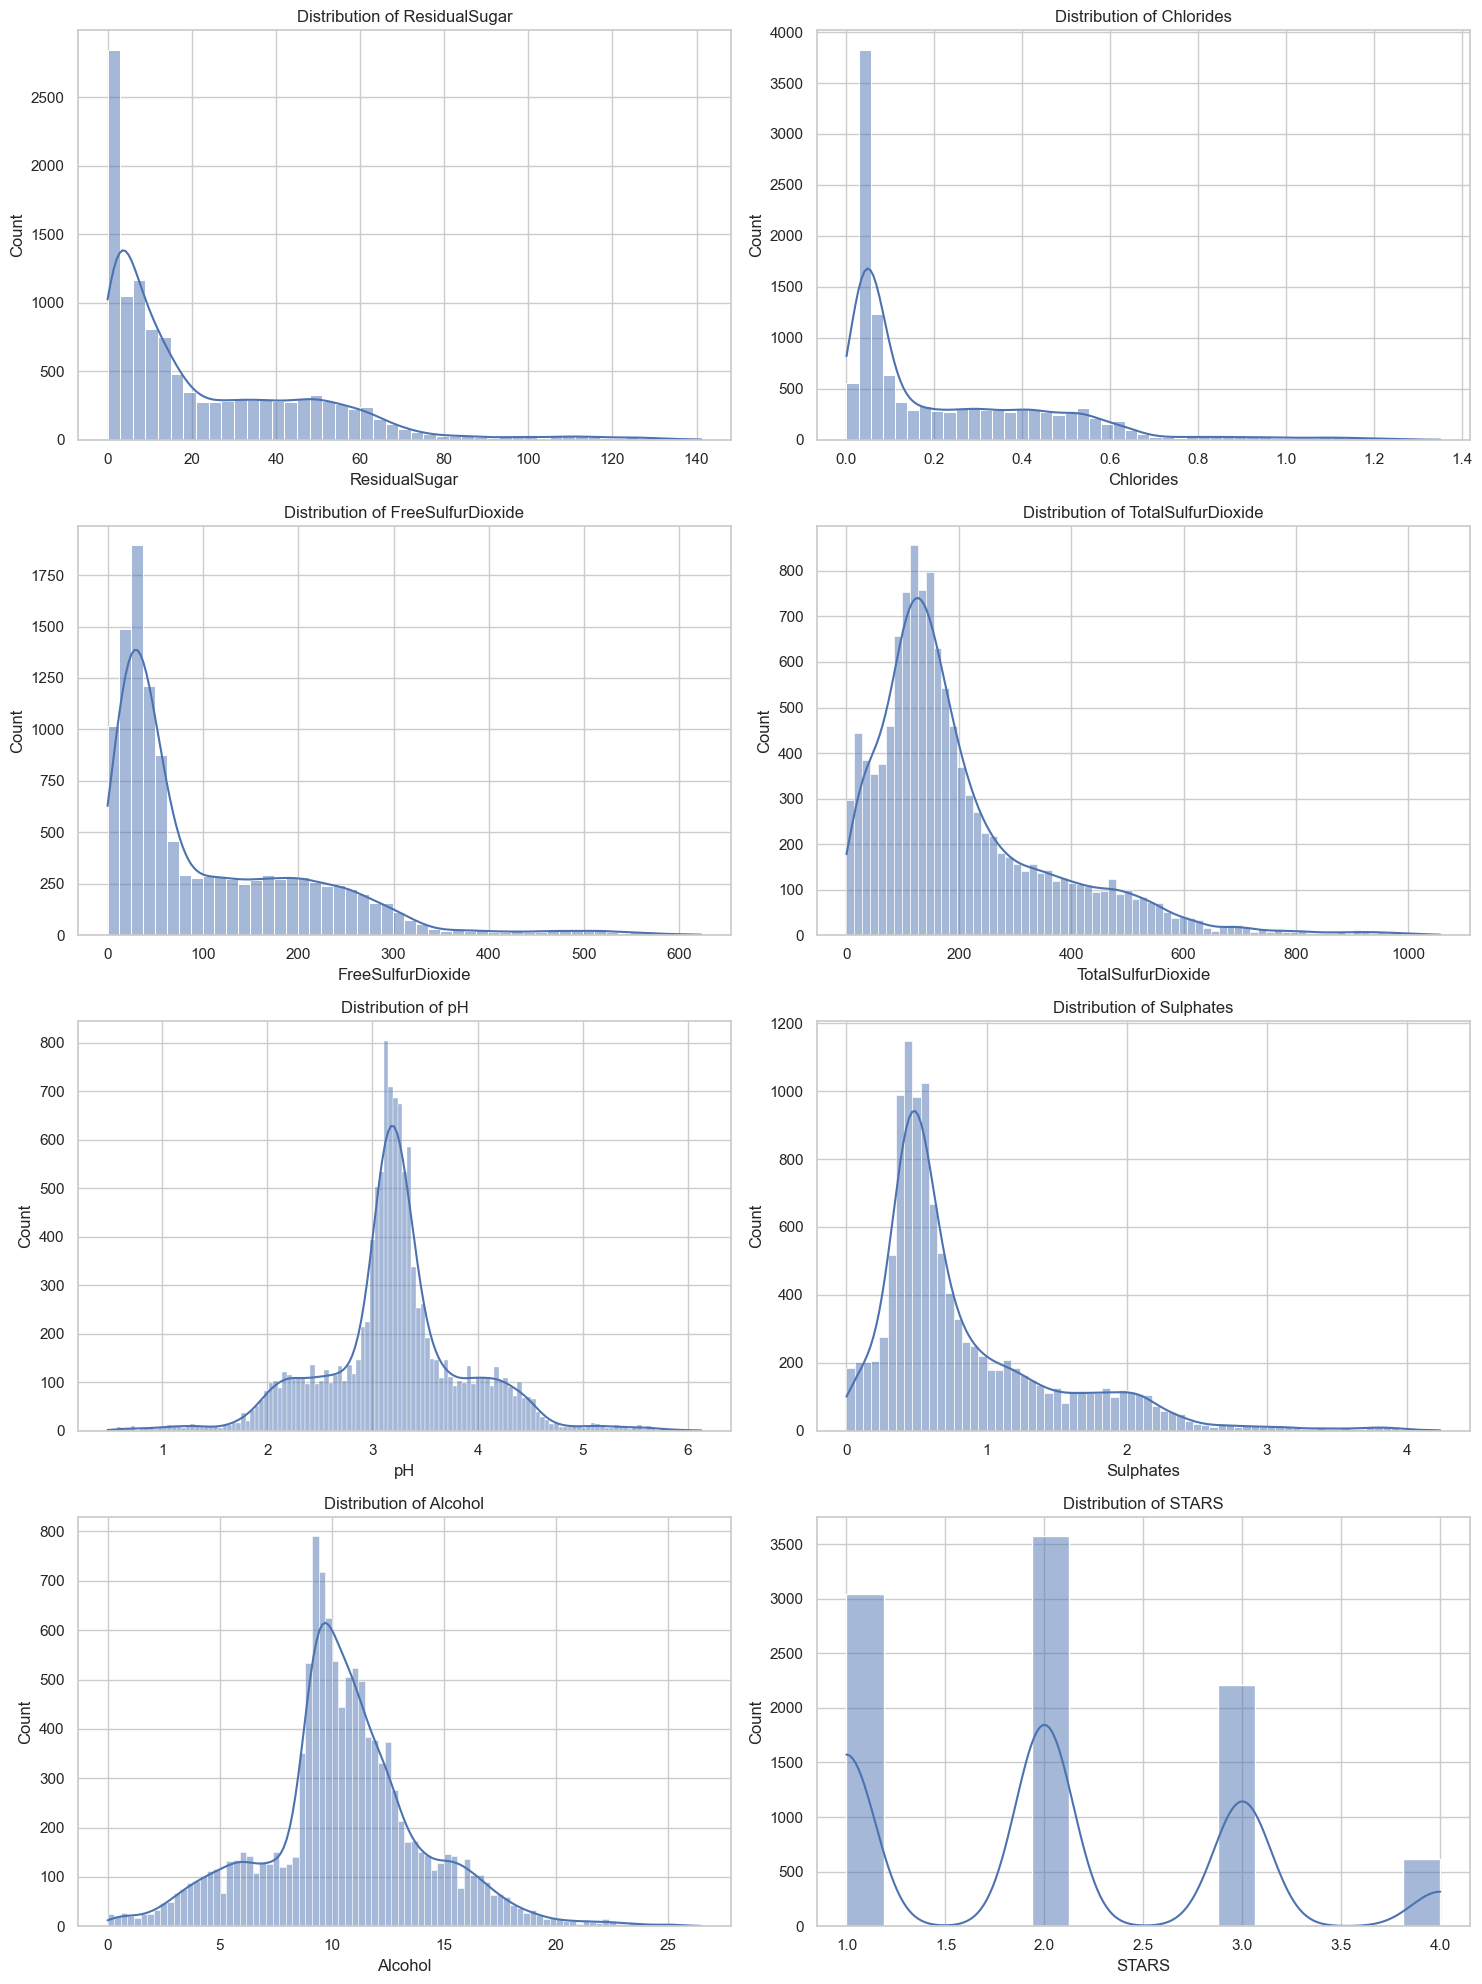

In [10]:
columns = ['ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'pH', 'Sulphates', 'Alcohol', 'STARS']

fig, axs = plt.subplots(4, 2, figsize=(15, 20)) 
for i, col in enumerate(columns):
    row = i // 2
    col_index = i % 2
    sns.histplot(wine_raw[col], ax=axs[row, col_index], kde=True) 
    axs[row, col_index].set_title(f'Distribution of {col}')
    
plt.tight_layout()
plt.show()

__Relationship Between Missing Value Columns and Target__  
+ We can see from the heatmap that "Target" has no strong relationship with other variables, but has a light trend with labelappeal, Acidindex and stars. And Lableappeal and Stars have a weak positive relation at the same time.

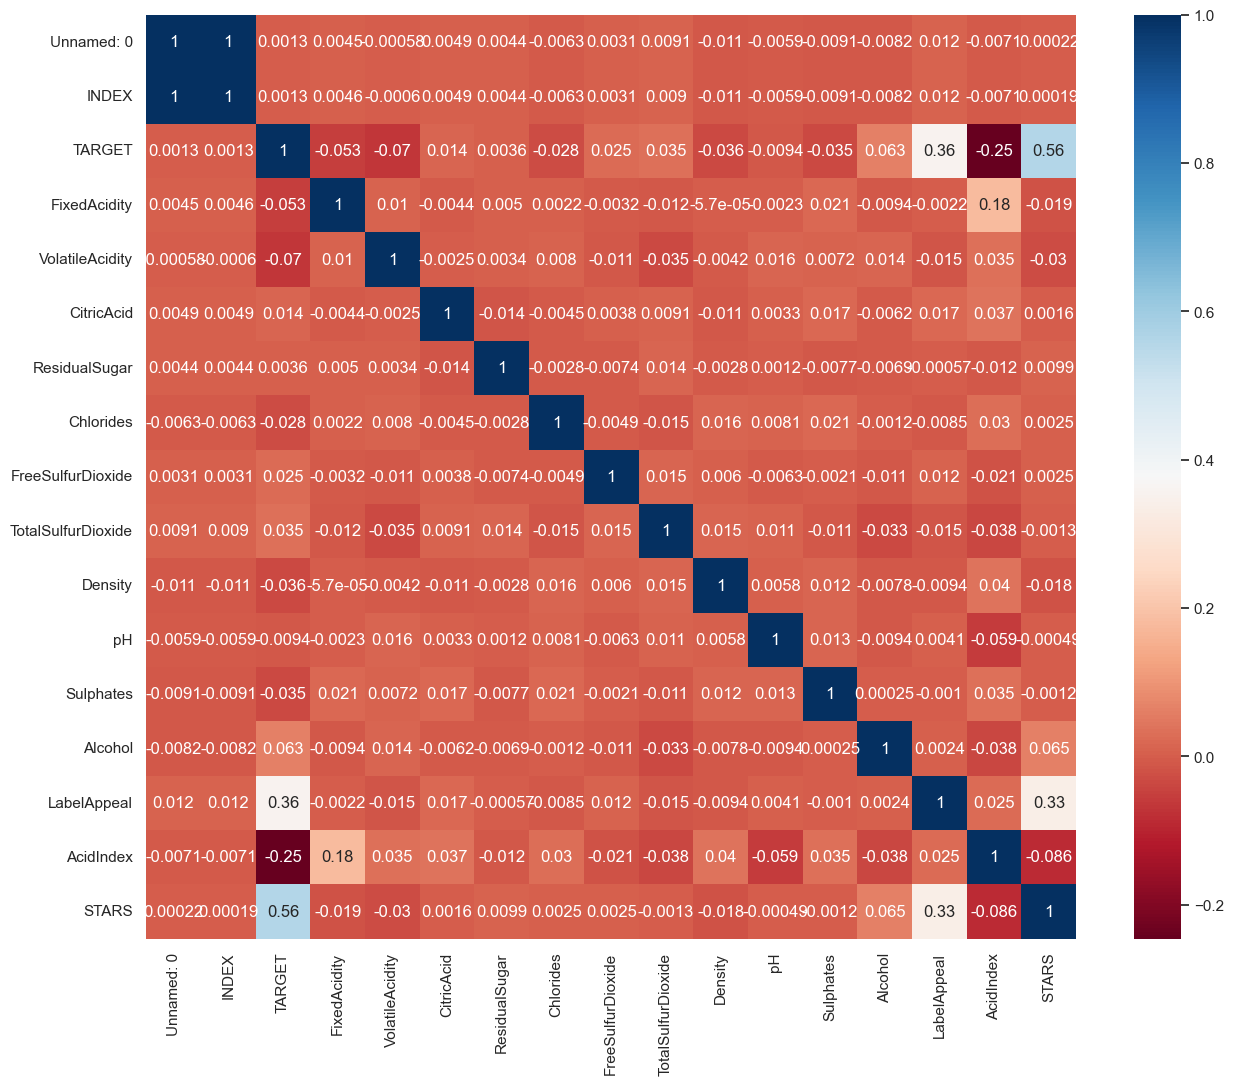

In [11]:
plt.figure(figsize=(15,12))
corr = wine_raw.corr()
sns.heatmap(corr, cmap="RdBu",xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)
plt.show()

### 2.4 Summary
To summarize, there are following variables needs cleaning:

+ Drop Columns: "Unnamed: 0","INDEX".

+ Invalid Values: "FreeSulfurDioxide","TotalSulfurDioxide","pH","Alcohol".

+ Null Values: The plot below can show the overview of the null values.

Unnamed: 0               0
INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
AcidIndex                0
LabelAppeal              0
Density                  0
pH                     395
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
Alcohol                653
TotalSulfurDioxide     682
Sulphates             1210
STARS                 3359
dtype: int64

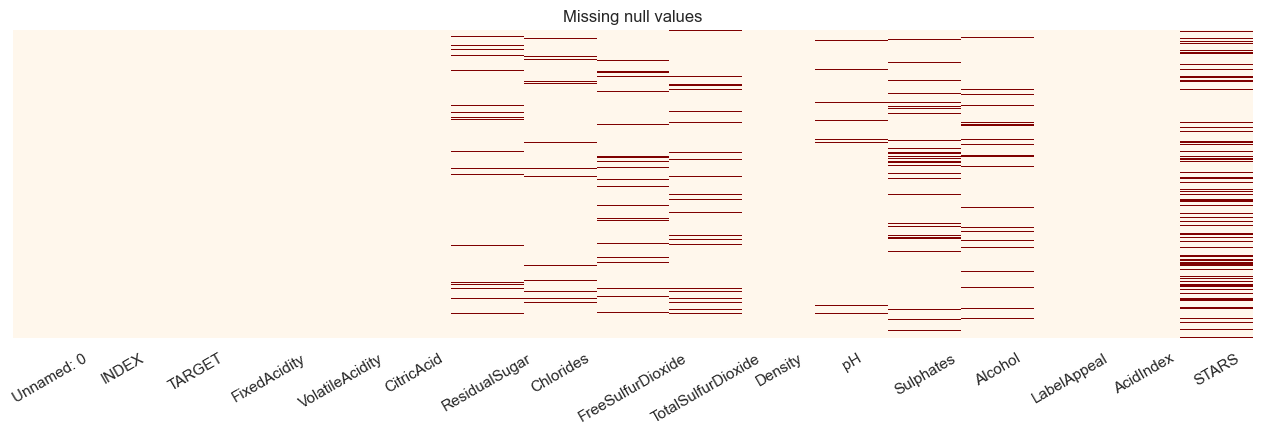

In [12]:
plt.rcParams["figure.figsize"] = (16, 4)
sns.heatmap(wine_raw.isnull(), yticklabels=False, cbar=False, cmap="OrRd")
plt.title("Missing null values")
plt.xticks(rotation=30)
wine_raw.isnull().sum().sort_values()

# 3. Data Preparation
In this section, the dataset will be cleaned by following steps: Invalid value filtering, missing value imputation and data transformation.


### 3.1 Invalid data
Based on the previous EDA, we can conclude that the values we need will be concentrated within the following ranges: the wine's free sulfur dioxide no more than 400, total sulfur dioxide no more than 400, pH values between 2.5 and 4.5, and alcohol percentage under 24.

From the result, there are 10871 valid observations. 

In [13]:
data_condition = (
    (wine_raw['FreeSulfurDioxide'] <= 400)
    & (wine_raw['TotalSulfurDioxide'] <= 400)
    & (wine_raw['pH'] > 2.5) & (wine_raw['pH'] < 4.5)
    & (wine_raw['Alcohol'] <= 24)
)

wine_valid = wine_raw[data_condition | wine_raw.isnull().any(axis=1)]
wine_valid

,Unnamed: 0,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,0,1,3,3.2,1.16,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,0,8,2.0
1,1,2,3,4.5,0.16,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,2,4,5,7.1,2.64,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
4,4,6,4,8.0,0.33,1.26,9.4,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0
5,5,7,0,11.3,0.32,0.59,2.2,0.556,37.0,15.0,0.99940,3.20,1.29,15.4,0,11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12790,12790,16120,0,5.0,0.79,2.01,5.0,0.043,17.0,101.0,1.01077,3.39,0.57,4.9,1,5,NaN
12791,12791,16123,5,8.9,0.47,0.29,84.9,0.259,54.0,NaN,0.99518,4.46,1.20,NaN,-1,8,2.0
12792,12792,16127,4,6.0,0.17,1.10,37.0,0.078,25.0,108.0,0.99076,3.25,NaN,12.3,0,6,2.0
12793,12793,16128,3,7.7,0.32,0.12,NaN,0.029,26.0,274.0,0.99060,3.97,0.62,11.0,-1,6,2.0


### 3.2 Meaningless variables

As addressed in [2.1], the variables has no meaning and can be dropped.

In [14]:
wine_valid = wine_valid.drop(["Unnamed: 0","INDEX"],axis=1)

### 3.3 Missing Values 
#### 1) Imputation methods
According to the EDA, We can see that there are three features of missing values:
1. There are 8 null values which can be divides into numerical data and categorical data:

 |  data type| column name
 |-------------------|--------------------------------------------------------------------------------------------------------------|
 | numerical data | PH                    |
 | numerical data  | Residual Sugar        |
 |  numerical data | Chlorides             |
 |  numerical data | Free Sulfur Dioxide   |
 |  numerical data | Total Sulfur Dioxide  |
 |  numerical data | Sulphates             |
 |  numerical data | Alcohol               |
 |categorical data| Star                   |
2. Dataset is complex and huge.
3. Missing values are randomly distributed.

Based on the feature above. We are going to use KNN imputer to replace missing values.

#### 2) KNN Imputer

We use the KNN function to deal with the missing values. The suggested n_neighbors is two. But considering the dataset is huge and have some weak correlation. And we have too much variables need to add missing values which need bigger n_neighbors. So we can increase n_neighbors to 5 which is not big enough in case some noise.

In [15]:
from sklearn.impute import KNNImputer
# Use knn function to deal with the missing values
imputer = KNNImputer(n_neighbors=2)
wine = pd.DataFrame(imputer.fit_transform(wine_valid),columns = wine_valid.columns)
wine.tail(15)

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
10856,4.0,17.5,0.41,0.21,22.70,0.4230,12.5,830.00,0.99355,3.630,0.290,9.400,0.0,7.0,1.0
10857,3.0,4.1,0.55,0.31,13.55,0.1330,29.0,49.00,0.99544,3.200,0.860,11.000,-1.0,7.0,2.0
10858,0.0,11.6,1.04,0.57,3.20,0.1550,3.0,55.00,0.99810,2.000,0.700,9.900,1.0,12.0,2.5
10859,0.0,15.2,0.21,0.32,5.40,0.4210,29.0,184.00,0.99500,2.935,0.460,0.000,-1.0,7.0,2.0
10860,6.0,6.4,0.69,0.09,53.90,0.0440,34.0,129.50,0.99480,3.550,0.460,14.575,2.0,7.0,3.0
10861,4.0,7.3,0.33,0.94,42.50,0.0360,15.0,85.00,0.97287,2.990,1.150,14.000,0.0,9.0,2.0
10862,0.0,6.8,0.13,1.15,3.90,0.4780,228.0,29.00,0.99524,2.730,0.100,13.600,-1.0,8.0,2.5
10863,2.0,6.5,0.15,0.78,1.40,0.8750,531.0,105.00,0.99260,3.140,0.675,10.100,0.0,7.0,1.0
10864,4.0,8.4,0.30,0.38,37.10,0.6330,208.0,220.00,0.99830,2.830,0.250,9.300,-1.0,8.0,3.0
10865,4.0,4.4,0.22,0.29,1.90,0.5250,30.0,391.00,0.99710,3.450,0.590,9.500,0.0,8.0,1.0


## 3.4 Transformation(boxcox)

Now let's see the distributions of the new dataset, we observe that some of the predictors are skewed. Skewness can adversely affect modeling; therefore, we plan to apply a Box-Cox transformation to mitigate the skewness in the dataset. But, before proceeding with the transformation, let's first assess the skewness values of the predictors.

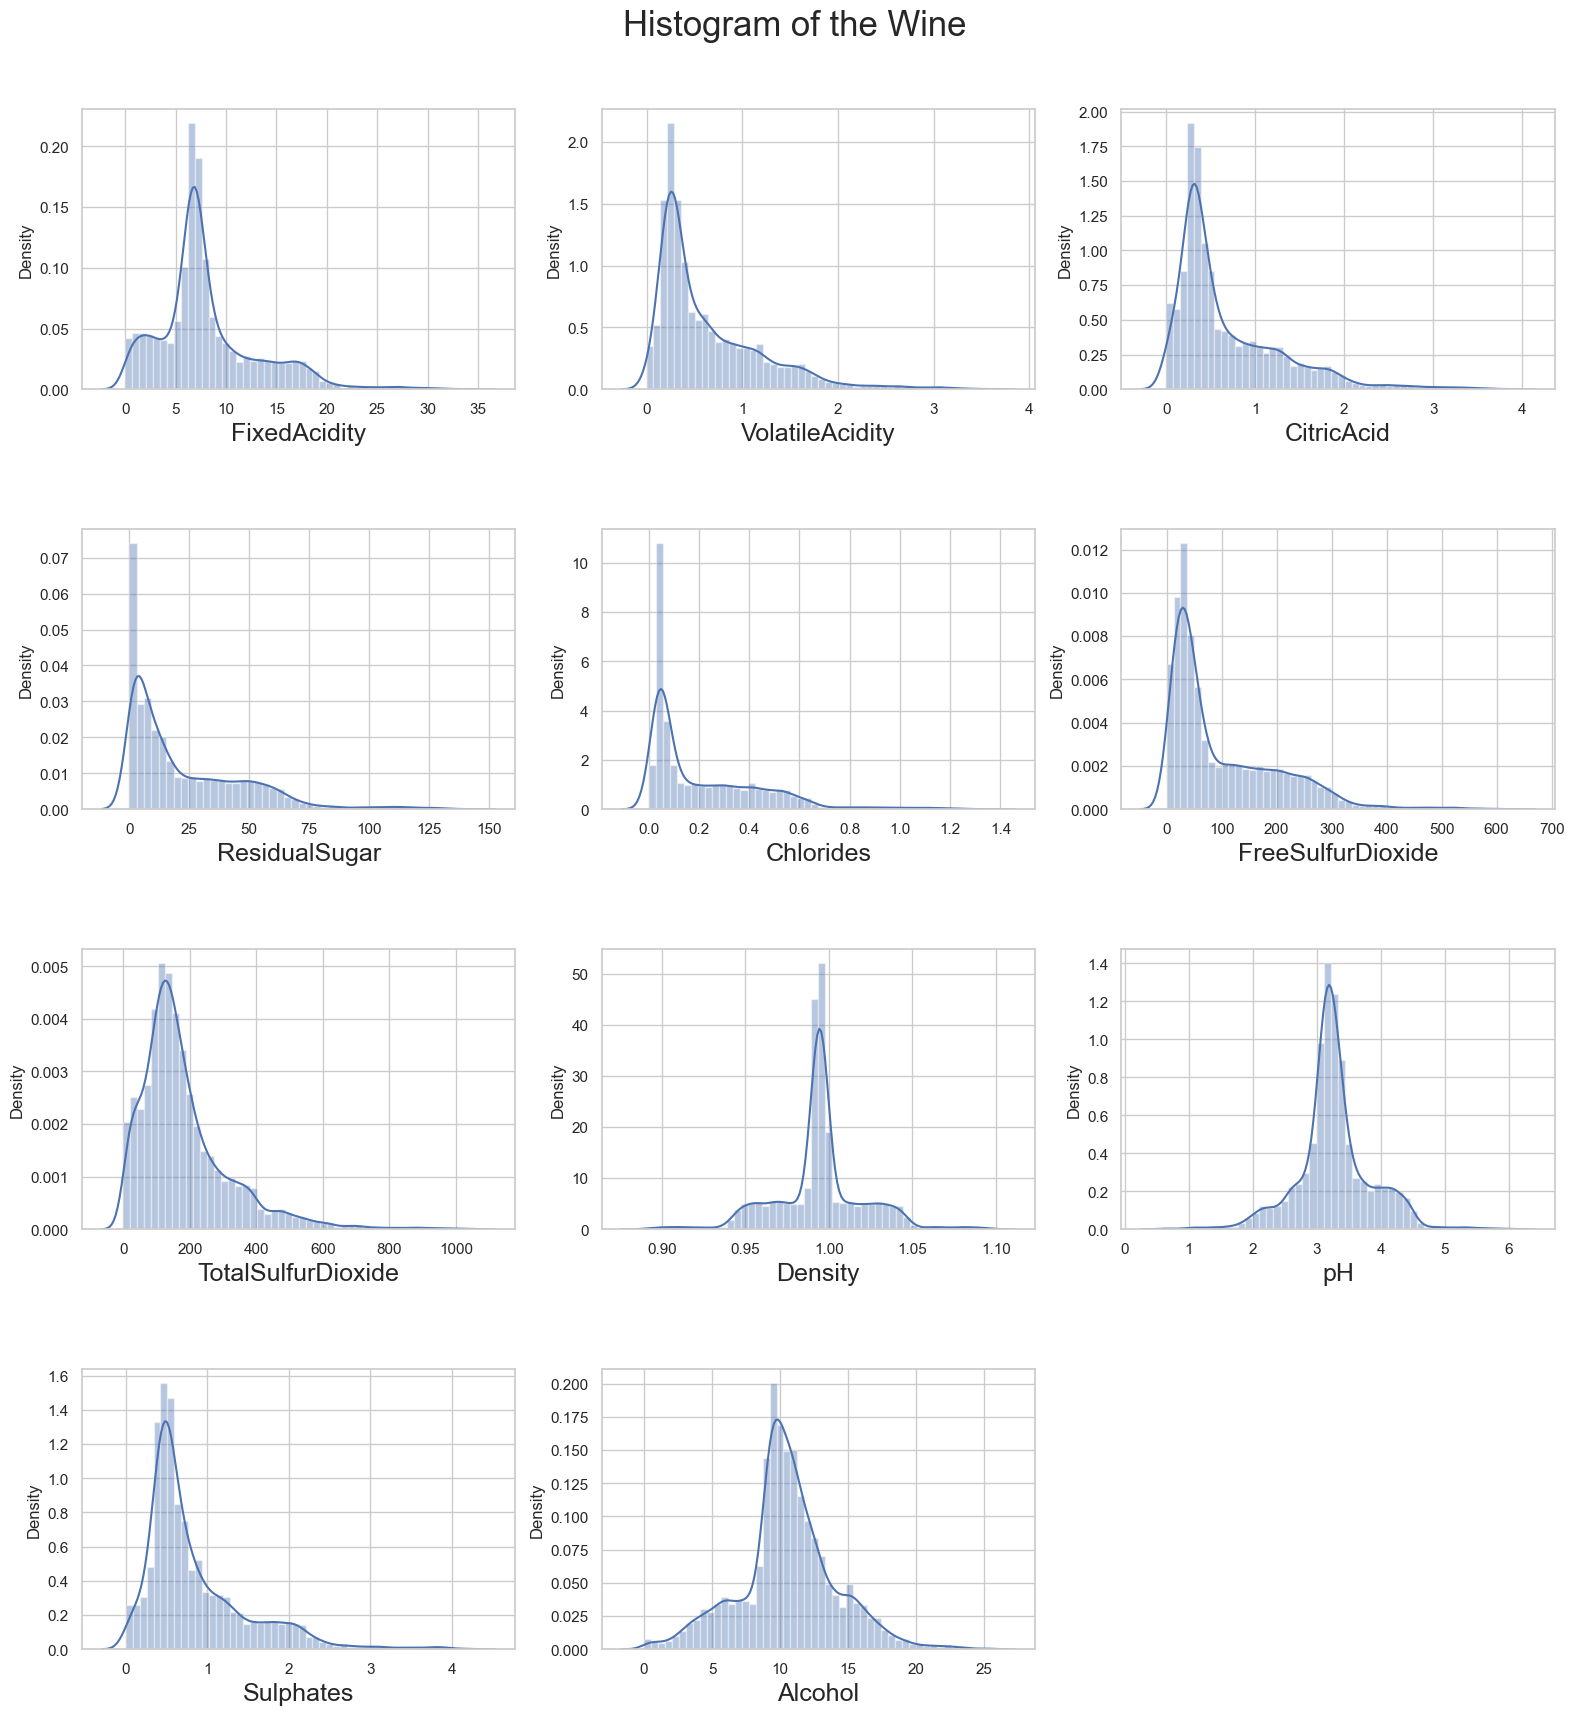

In [16]:
def subplot_hist(data, row=5, column=3, title="Subplots", height=20, width=19):
    fig = plt.figure(figsize=(width, height))
    fig.suptitle(title, fontsize=25, y=0.93)
    total_plots = row * column 
    for i in range(min(data.shape[1], total_plots)):
        ax = fig.add_subplot(row, column, i + 1)
        fig.subplots_adjust(hspace=.5)
        sns.distplot(data.iloc[:, i], ax=ax)
        ax.xaxis.get_label().set_font_properties(fm.FontProperties(size=18))
    plt.show()
    
subplot_hist(wine.iloc[:, 1:-3], row=4, column=3, title="Histogram of the Wine")

Now we calculate the skewness of each specified column，categorize it into 'Light Skewed', 'Moderately Skewed', or 'Heavily Skewed' based on the skewness value. Based on the table, we have the skewness table for the dataset. It is clear that most of the predictors are heavily skewed. Therefore, applying a Box-Cox transformation should considerably help in removing the skewness.

In [17]:
from scipy import stats
def skewness_check(data):
    skew_value = list(stats.skew(data, axis=0, bias=False))
    skew_string = []
    for skew in skew_value:
        if skew >= -.5 and skew <= .5:
            skew_string.append("Light Skewed")
        elif (skew > .5 and skew < 1) or (skew < -.5 and skew > -1):
            skew_string.append("Moderately Skewed")
        else:
            skew_string.append("Heavily Skewed")

    skew_df = pd.DataFrame({'Column': data.columns, 'Skewness': skew_value, 'Skew Category': skew_string})
    return skew_df
skewness_check(wine.iloc[:, 1:-1])

,Column,Skewness,Skew Category
0,FixedAcidity,1.195154,Heavily Skewed
1,VolatileAcidity,1.634075,Heavily Skewed
2,CitricAcid,1.648358,Heavily Skewed
3,ResidualSugar,1.460269,Heavily Skewed
4,Chlorides,1.493219,Heavily Skewed
5,FreeSulfurDioxide,1.378635,Heavily Skewed
6,TotalSulfurDioxide,1.818538,Heavily Skewed
7,Density,-0.023733,Light Skewed
8,pH,0.094316,Light Skewed
9,Sulphates,1.720345,Heavily Skewed


We can observe that 'FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Sulphates', 'Alcohol', and 'AcidIndex' are not following a normal distribution. But when doing a boxcox transformation we found out that the new dataset still has some observation to be zero. To handle this we will just add 0.001 to the column so that we are not distorating the distribution and at the same time we can perform boxcox trainsfomation. We can now apply the Box-Cox transformation to these data.

In [29]:
from scipy.stats import boxcox
from sklearn.preprocessing import power_transform

# Function to apply Box-Cox transformation to the specified columns
def apply_boxcox(data, cols):
    for col in cols:
        # Check if the column has only positive values
        if (data[col] > 0).all():
            data[col], _ = boxcox(data[col])
        else:
            print(f"The column '{col}' cannot be Box-Cox transformed due to non-positive values.")
    return data

# Columns to transform based on the skewness results
cols_to_transform = ['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides','FreeSulfurDioxide', 
                     'TotalSulfurDioxide', 'Sulphates','pH', 'Alcohol', 'AcidIndex']
for col in cols_to_transform:
    wine[col] += 0.0001
wine_data = apply_boxcox(wine.copy(), cols_to_transform)

skewness_check(wine_data[cols_to_transform])

,Column,Skewness,Skew Category
0,FixedAcidity,0.026432,Light Skewed
1,VolatileAcidity,0.017915,Light Skewed
2,CitricAcid,0.041747,Light Skewed
3,ResidualSugar,-0.066214,Light Skewed
4,Chlorides,0.003038,Light Skewed
5,FreeSulfurDioxide,-0.024772,Light Skewed
6,TotalSulfurDioxide,0.042579,Light Skewed
7,Sulphates,0.085452,Light Skewed
8,pH,0.153353,Light Skewed
9,Alcohol,0.065407,Light Skewed


# 4. Prepped Data Review
After fixing the missing data values, invalid data values, and transformed data distribution, we will re-run the EDA on the adjusted variables during the data preparation work.

First check the null values in the dataset. There are no null values in the dataset.

TARGET                0
FixedAcidity          0
VolatileAcidity       0
CitricAcid            0
ResidualSugar         0
Chlorides             0
FreeSulfurDioxide     0
TotalSulfurDioxide    0
Density               0
pH                    0
Sulphates             0
Alcohol               0
LabelAppeal           0
AcidIndex             0
STARS                 0
dtype: int64

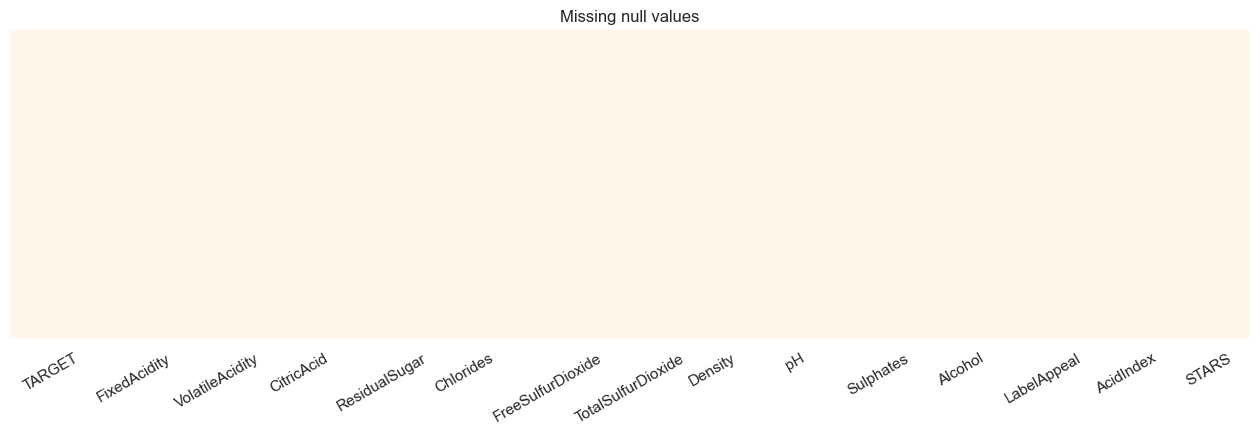

In [19]:
plt.rcParams["figure.figsize"] = (16, 4)
sns.heatmap(wine_data.isnull(), yticklabels=False, cbar=False, cmap="OrRd")
plt.title("Missing null values")
plt.xticks(rotation=30)
wine_data.isnull().sum().sort_values()

Check the histogram of all variables, they are all in a better distribution and ready for model prediction.

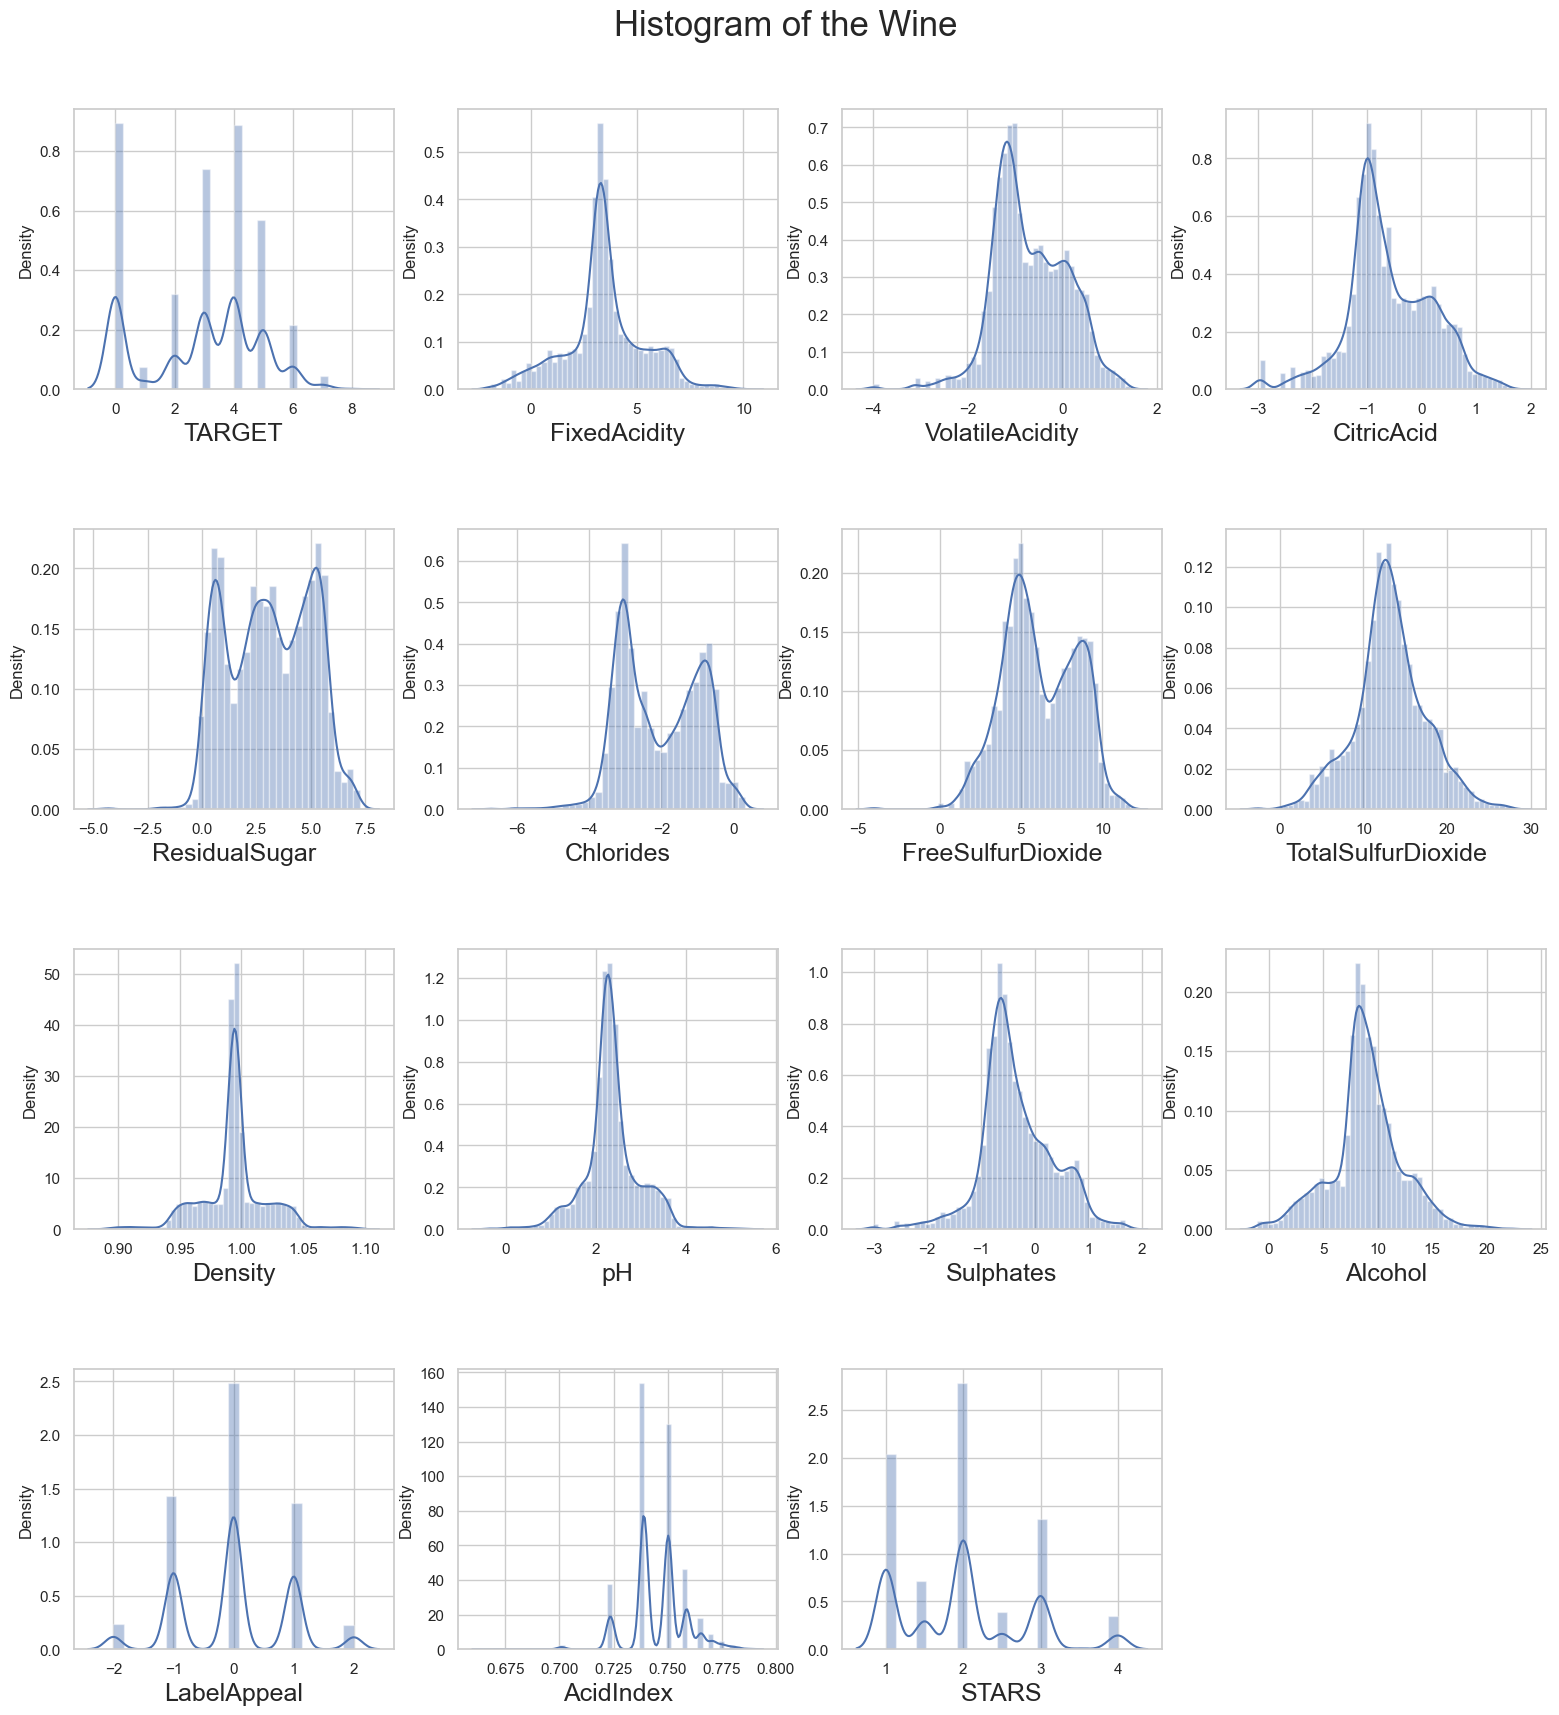

In [20]:
subplot_hist(wine_data, row=4, column=4, title="Histogram of the Wine")

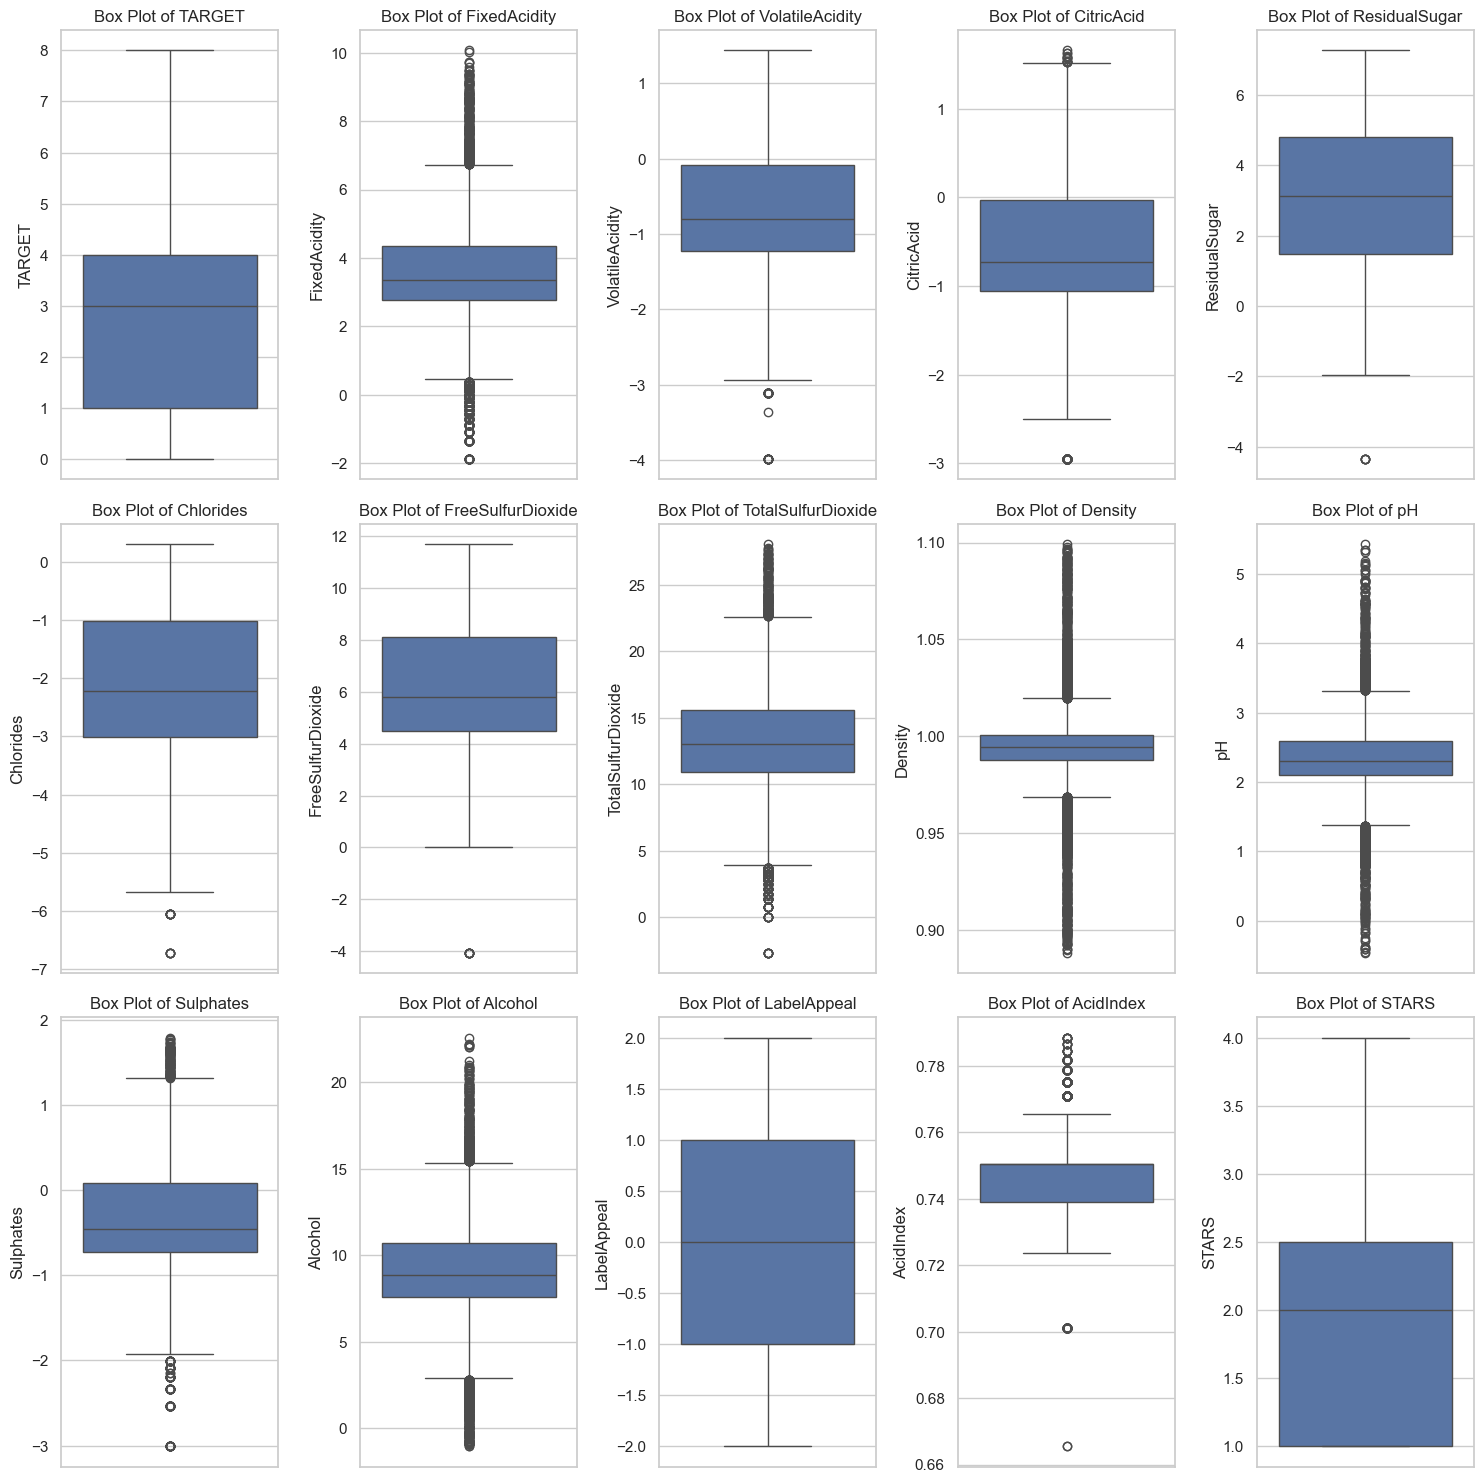

In [21]:
fig, axs = plt.subplots(3, 5, figsize=(15, 15)) 
for i, col in enumerate(wine_data.columns):
    row = i // 5
    col_index = i % 5
    sns.boxplot(y=wine_data[col], ax=axs[row, col_index]) 
    axs[row, col_index].set_title(f'Box Plot of {col}')
    
plt.tight_layout()
plt.show()


The initial EDA shows the histogram and box plot show a skewed distribution and has many outliers. After the data cleaning and transforming, most data follows a nearly normal distribution, but still having many outliers in some variables. With these data, we can really pay attention to the parts of the wine that might change how good it is. We can use these information for the next part of our work, to see how these parts of the wine make a difference.

# Conclusion: 
There exists a lot of unusual phenomenon in this dataset including missing values, invalid values and skewness. In order to have a more Completed dataset and improve this dataset's useability, we cleaned the data by handling invalid through domain knowledge. Next, we use KNN function to impute the missing values. Last, we observe that there is some skewness using histrom charts and transform it to a normal distribution with fewer outliers. 

At this point, we can start to build models and predict the variables and targets of each wine. The results will also be more accurate, helping manufacturers to make further improvements.

# Reference: 
- KNNImputer: https://scikit-learn.org/stable/modules/impute.html
- BOXCOX: https://www.statology.org/box-cox-transformation-python/
- K value of KNN: https://www.cxyzjd.com/article/m0_46510245/109270839
- Wine domain knowledge:  
https://winemakersacademy.com/understanding-wine-acidity/  
https://www.wineenthusiast.com/basics/advanced-studies/what-is-acidity-in-wine/  
https://www.dpi.nsw.gov.au/__data/assets/pdf_file/0007/1265227/Acidity-management-of-grapevines-and-wines.pdf  
https://www.oiv.int/public/medias/2601/oiv-ma-c1-01.  
https://winefolly.com/tips/the-lightest-to-the-strongest-wine/  